In [2]:
import pandas as pd 
import numpy as np

In [3]:
df = pd.read_csv('coffee_shop_revenue.csv')

In [4]:
df = df[df['Daily_Revenue'] >= 0]

In [5]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
df.columns.to_list()

['Number_of_Customers_Per_Day',
 'Average_Order_Value',
 'Operating_Hours_Per_Day',
 'Number_of_Employees',
 'Marketing_Spend_Per_Day',
 'Location_Foot_Traffic',
 'Daily_Revenue']

##### 'Number_of_Customers_Per_Day'- have corr = 0.75
##### 'Average_Order_Value' - have corr = 0,5

In [8]:
df['Revenue_per_Employee'] = np.where(df['Number_of_Employees'] != 0,
                                      df['Daily_Revenue'] / df['Number_of_Employees'],
                                      np.nan)

df['Marketing_Efficiency'] = np.where(df['Marketing_Spend_Per_Day'] != 0,
                                      df['Daily_Revenue'] / df['Marketing_Spend_Per_Day'],
                                      np.nan)

df['Foot_Traffic_Conversion'] = np.where(df['Location_Foot_Traffic'] != 0,
                                         df['Number_of_Customers_Per_Day'] / df['Location_Foot_Traffic'],
                                         np.nan)

df['Revenue_per_Operating_Hour'] = np.where(df['Operating_Hours_Per_Day'] != 0,
                                            df['Daily_Revenue'] / df['Operating_Hours_Per_Day'],
                                            np.nan)


In [10]:
X = df.drop(columns=['Daily_Revenue', 'Number_of_Customers_Per_Day', 'Operating_Hours_Per_Day'])
y = df['Daily_Revenue']

In [11]:
# X = df[[
#   'Number_of_Customers_Per_Day',
#  'Marketing_Spend_Per_Day',
#  'Location_Foot_Traffic',
#  'Revenue_per_Employee',
#  'Marketing_Efficiency',
#  'Foot_Traffic_Conversion', 
#  'Number_of_Employees'
#  ]]
 
# y = df[df.columns[-1]]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV



In [14]:
scal = StandardScaler()

X_train = scal.fit_transform(X_train)
X_test = scal.fit_transform(X_test)


# Cat_boost part

In [15]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, root_mean_squared_error, r2_score

In [16]:
model = CatBoostRegressor(verbose=0)

In [17]:
model.fit(X_train, y_train)
y_test_pred  = model.predict(X_test)
y_train_pred = model.predict(X_train)

In [18]:
y_train_pred = np.array(y_train_pred)
y_train_pred.shape

(1599,)

In [19]:
mae_train = mean_absolute_error(y_train, y_train_pred )
mape_train = mean_absolute_percentage_error (y_train, y_train_pred )
mse_train = mean_squared_error(y_train, y_train_pred )
rmse_train = root_mean_squared_error(y_train, y_train_pred )
r2_train = r2_score(y_train, y_train_pred )

In [20]:
mae = mean_absolute_error(y_test, y_test_pred )
mape = mean_absolute_percentage_error (y_test, y_test_pred )
mse = mean_squared_error(y_test, y_test_pred )
rmse = root_mean_squared_error(y_test, y_test_pred )
r2 = r2_score(y_test, y_test_pred )

In [21]:
print(f"MAE: {mae_train:.4f}")
print(f"MAPE: {mape_train:.4f}")
print(f"MSE: {mse_train:.4f}")
print(f"RMSE: {rmse_train:.4f}")
print(f"R²: {r2_train:.4f}")

MAE: 23.8391
MAPE: 0.0154
MSE: 896.6287
RMSE: 29.9438
R²: 0.9991


In [22]:
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

MAE: 99.1037
MAPE: 0.0649
MSE: 16262.8251
RMSE: 127.5258
R²: 0.9832


# xg_boost_part

In [23]:
model = XGBRegressor()

In [24]:
model.fit(X_train, y_train)
y_test_pred  = model.predict(X_test)
y_train_pred = model.predict(X_train)

In [25]:
mae_train = mean_absolute_error(y_train, y_train_pred )
mape_train = mean_absolute_percentage_error (y_train, y_train_pred )
mse_train = mean_squared_error(y_train, y_train_pred )
rmse_train = root_mean_squared_error(y_train, y_train_pred )
r2_train = r2_score(y_train, y_train_pred )

In [26]:
mae = mean_absolute_error(y_test, y_test_pred )
mape = mean_absolute_percentage_error (y_test, y_test_pred )
mse = mean_squared_error(y_test, y_test_pred )
rmse = root_mean_squared_error(y_test, y_test_pred )
r2 = r2_score(y_test, y_test_pred )

In [27]:
print(f"MAE: {mae_train:.4f}")
print(f"MAPE: {mape_train:.4f}")
print(f"MSE: {mse_train:.4f}")
print(f"RMSE: {rmse_train:.4f}")
print(f"R²: {r2_train:.4f}")

MAE: 8.2411
MAPE: 0.0052
MSE: 139.0553
RMSE: 11.7922
R²: 0.9999


In [28]:
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

MAE: 146.4895
MAPE: 0.0934
MSE: 37265.7972
RMSE: 193.0435
R²: 0.9615


In [29]:
model = DecisionTreeRegressor()

In [30]:
model.fit(X_train, y_train)
y_test_pred  = model.predict(X_test)
y_train_pred = model.predict(X_train)

In [31]:
mae_train = mean_absolute_error(y_train, y_train_pred )
mape_train = mean_absolute_percentage_error (y_train, y_train_pred )
mse_train = mean_squared_error(y_train, y_train_pred )
rmse_train = root_mean_squared_error(y_train, y_train_pred )
r2_train = r2_score(y_train, y_train_pred )

In [32]:
mae = mean_absolute_error(y_test, y_test_pred )
mape = mean_absolute_percentage_error (y_test, y_test_pred )
mse = mean_squared_error(y_test, y_test_pred )
rmse = root_mean_squared_error(y_test, y_test_pred )
r2 = r2_score(y_test, y_test_pred )

In [33]:
print(f"MAE: {mae_train:.4f}")
print(f"MAPE: {mape_train:.4f}")
print(f"MSE: {mse_train:.4f}")
print(f"RMSE: {rmse_train:.4f}")
print(f"R²: {r2_train:.4f}")

MAE: 0.0000
MAPE: 0.0000
MSE: 0.0000
RMSE: 0.0000
R²: 1.0000


In [34]:
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

MAE: 275.3056
MAPE: 0.1760
MSE: 139822.7866
RMSE: 373.9289
R²: 0.8555


In [35]:
model = LinearRegression()

In [36]:
model.fit(X_train, y_train)
y_test_pred  = model.predict(X_test)
y_train_pred = model.predict(X_train)

In [37]:
mae_train = mean_absolute_error(y_train, y_train_pred )
mape_train = mean_absolute_percentage_error (y_train, y_train_pred )
mse_train = mean_squared_error(y_train, y_train_pred )
rmse_train = root_mean_squared_error(y_train, y_train_pred )
r2_train = r2_score(y_train, y_train_pred )

In [38]:
mae = mean_absolute_error(y_test, y_test_pred )
mape = mean_absolute_percentage_error (y_test, y_test_pred )
mse = mean_squared_error(y_test, y_test_pred )
rmse = root_mean_squared_error(y_test, y_test_pred )
r2 = r2_score(y_test, y_test_pred )

In [39]:
print(f"MAE: {mae_train:.4f}")
print(f"MAPE: {mape_train:.4f}")
print(f"MSE: {mse_train:.4f}")
print(f"RMSE: {rmse_train:.4f}")
print(f"R²: {r2_train:.4f}")

MAE: 329.5515
MAPE: 0.2085
MSE: 178827.5924
RMSE: 422.8801
R²: 0.8111


In [40]:
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

MAE: 333.3465
MAPE: 0.2197
MSE: 185601.8751
RMSE: 430.8154
R²: 0.8081


In [41]:
from sklearn.ensemble import RandomForestRegressor

In [42]:
model = RandomForestRegressor(random_state=42)

# 5. Определяем сетку параметров
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10]
}

# 6. Используем GridSearchCV для подбора параметров
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring="neg_mean_absolute_error",  # Используем MAE
    cv=5,  # 5-фолдовая кросс-валидация
    verbose=1,  # Вывод процесса
    n_jobs=-1  # Используем все ядра процессора
)

# 7. Запускаем подбор параметров
grid_search.fit(X_train, y_train)

# 8. Выводим лучшие параметры
print("Лучшие параметры:", grid_search.best_params_)

# 9. Обучаем модель с лучшими параметрами
best_model = grid_search.best_estimator_

# 10. Предсказываем на тесте
y_pred = best_model.predict(X_test)

# 11. Оцениваем модель
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Лучший MAE: {mae:.4f}")
print(f"Лучший R²: {r2:.4f}")


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Лучшие параметры: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Лучший MAE: 196.0848
Лучший R²: 0.9294


In [43]:
import matplotlib.pyplot as plt

In [44]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

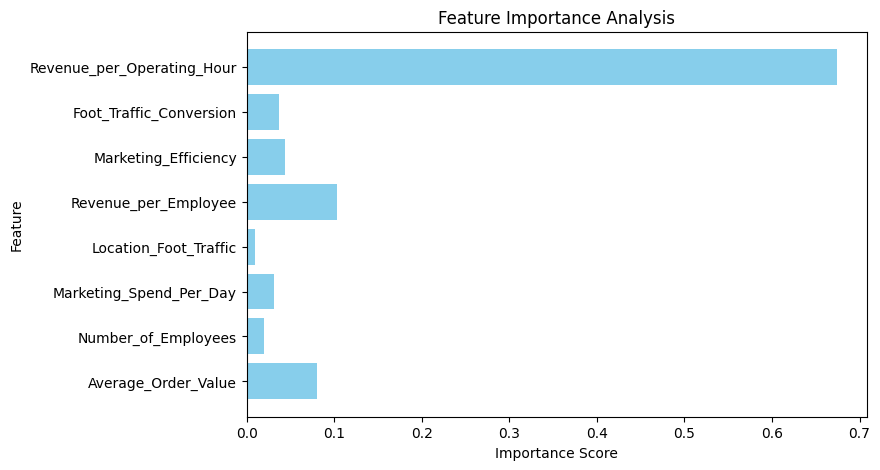

In [45]:
importance = model.feature_importances_

# Plot feature importance
plt.figure(figsize=(8,5))
plt.barh(X.columns, importance, color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Feature Importance Analysis')
plt.show()

In [46]:
cat_model = CatBoostRegressor(random_state=42, verbose=0)

In [47]:
cat_param_grid = {
    "iterations": [100, 200, 300],
    "depth": [4, 6, 8],
    "learning_rate": [0.01, 0.05, 0.1],
    "l2_leaf_reg": [1, 3, 5]  # коэффициент L2-регуляризации
}


In [48]:
grid_cat = GridSearchCV(
    estimator=cat_model,
    param_grid=cat_param_grid,
    scoring="neg_mean_absolute_error",  # минимизируем MAE
    cv=5,  # 5-кратная кросс-валидация
    verbose=1,
    n_jobs=-1
)

In [49]:
grid_cat.fit(X_train, y_train)
best_cat = grid_cat.best_estimator_
print("✅ Лучшие параметры для CatBoost:", grid_cat.best_params_)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
✅ Лучшие параметры для CatBoost: {'depth': 6, 'iterations': 300, 'l2_leaf_reg': 1, 'learning_rate': 0.1}


In [50]:
xgb_model = XGBRegressor(objective="reg:squarederror", random_state=42)

# Определяем сетку гиперпараметров для XGBoost
xgb_param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.7, 0.8, 1.0],
    "colsample_bytree": [0.7, 0.8, 1.0]
}

In [51]:
grid_xgb = GridSearchCV(
    estimator=xgb_model,
    param_grid=xgb_param_grid,
    scoring="neg_mean_absolute_error",
    cv=5,
    verbose=1,
    n_jobs=-1
)


In [52]:
grid_xgb.fit(X_train, y_train)
best_xgb = grid_xgb.best_estimator_
print("✅ Лучшие параметры для XGBoost:", grid_xgb.best_params_)


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
✅ Лучшие параметры для XGBoost: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.7}


In [57]:
y_pred_cat = best_cat.predict(X_test)
cat_mae = mean_absolute_error(y_test, y_pred_cat)
cat_r2 = r2_score(y_test, y_pred_cat)
cat_mape = mean_absolute_percentage_error(y_test, y_pred_cat)
print(f"CatBoost -> MAE: {cat_mae:.4f}, R²: {cat_r2:.4f}, mape: {cat_mape:.4f}")


CatBoost -> MAE: 108.8821, R²: 0.9791, mape: 0.0731


In [56]:
y_pred_xgb = best_xgb.predict(X_test)
xgb_mae = mean_absolute_error(y_test, y_pred_xgb)
xgb_r2 = r2_score(y_test, y_pred_xgb)
print(f"XGBoost  -> MAE: {xgb_mae:.4f}, R²: {xgb_r2:.4f}, mape: {cat_mape:.4f}")

XGBoost  -> MAE: 120.2585, R²: 0.9734, mape: 0.0731


# Final hiperparameters for models

In [86]:
cat_model = CatBoostRegressor(
    random_state=42, 
    verbose=0,
    depth=6,
    iterations=300,
    l2_leaf_reg=1,
    learning_rate=0.1,
    eval_metric='MAE',
    custom_metric=["R2", "MAPE", "MAE"],
    colsample_bylevel=1,
    subsample=1
    )

In [87]:
xgb_model = XGBRegressor(
    objective="reg:squarederror", 
    random_state=42,
    learning_rate=0.1,
    max_depth=4,
    n_estimators=300,
    subsample=0.7,
    eval_metric='MAE',
    custom_metric=["R2", "MAPE", "MAE"],
    alpha=0,
    colsample_bytree=0.9,
    )


In [88]:
X_train

array([[-0.84525605,  0.54801627,  1.42416536, ..., -0.421189  ,
         2.23786603, -0.08275495],
       [ 1.47045365, -1.06427079, -0.1257484 , ..., -0.47830904,
        -0.6767419 , -1.15379693],
       [ 1.51621867, -1.06427079, -0.30233248, ..., -0.07876349,
        -0.41998476, -0.24230601],
       ...,
       [-0.87729156, -1.60169981, -0.08852448, ..., -0.44598378,
         0.72913741, -0.52819139],
       [ 0.83431996,  0.54801627,  1.47424461, ..., -0.21140599,
         0.08893763,  1.18138121],
       [ 0.02427921, -0.25812726,  1.42642564, ..., -0.54430753,
        -0.60162484, -1.0950735 ]])

In [90]:
cat_model.fit(X_train, y_train)
# xgb_model.fit(X_train, y_train)

In [92]:
y_pred = cat_model.predict(X_test)


In [93]:
mae = mean_absolute_error(y_test, y_pred )
mape = mean_absolute_percentage_error (y_test, y_pred )
mse = mean_squared_error(y_test, y_pred )
rmse = root_mean_squared_error(y_test, y_pred )
r2 = r2_score(y_test, y_pred )

In [94]:
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

MAE: 105.8538
MAPE: 0.0708
MSE: 19467.2150
RMSE: 139.5250
R²: 0.9799


In [96]:
import joblib
joblib.dump(cat_model, "model.pkl")


['model.pkl']

In [58]:
catboost_params = {
    "l2_leaf_reg": [1, 3, 5, 10],  # L2-регуляризация
    "subsample": [0.7, 0.9, 1],  # Доля данных на каждое дерево
    "colsample_bylevel": [0.7, 0.9, 1],  # Доля фичей на уровень дерева
    "depth": [4, 6, 8],  # Глубина деревьев
}

xgboost_params = {
    "alpha": [0, 0.1, 0.5, 1, 10],  # L1-регуляризация
    "lambda": [1, 10, 100],  # L2-регуляризация
    "subsample": [0.7, 0.9, 1],  # Бэггинг
    "colsample_bytree": [0.7, 0.9, 1],  # Доля фичей на дерево
    "max_depth": [4, 6, 8],  # Глубина деревьев
}

In [59]:
catboost_model = CatBoostRegressor(iterations=500, learning_rate=0.05, loss_function="RMSE", verbose=0)
catboost_grid = GridSearchCV(catboost_model, catboost_params, cv=3, scoring="neg_root_mean_squared_error", n_jobs=-1)
catboost_grid.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostRegressor object at 0x00000201E265DB80>,
             n_jobs=-1,
             param_grid={'colsample_bylevel': [0.7, 0.9, 1], 'depth': [4, 6, 8],
                         'l2_leaf_reg': [1, 3, 5, 10],
                         'subsample': [0.7, 0.9, 1]},
             scoring='neg_root_mean_squared_error')

In [66]:
xgboost_model = XGBRegressor(objective="reg:squarederror", learning_rate=0.05, n_estimators=500)
xgboost_grid = GridSearchCV(xgboost_model, xgboost_params, cv=3, scoring="neg_root_mean_squared_error", n_jobs=-1)
xgboost_grid.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=0.05, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=500,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'alpha': [0, 0.1, 0.5, 1, 10],
                         'colsample_bytree': [0.7, 0.9, 1],
                         'lambda': [1, 10, 100], 'max_depth': [4, 6, 8],
                         'subsample': [0.7, 0.9, 1]},
             scoring='neg_root_mean_squared_error')

In [69]:
print("Лучшие параметры CatBoost:", catboost_grid.best_params_)
print("Лучшие параметры XGBoost:", xgboost_grid.best_params_)

Лучшие параметры CatBoost: {'colsample_bylevel': 1, 'depth': 6, 'l2_leaf_reg': 1, 'subsample': 1}
Лучшие параметры XGBoost: {'alpha': 0, 'colsample_bytree': 0.9, 'lambda': 1, 'max_depth': 4, 'subsample': 0.7}


In [70]:
from sklearn.model_selection import learning_curve

scoring = {"R2": "r2", "MAE": "neg_mean_absolute_error", "RMSE": "neg_root_mean_squared_error"}


train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, cv=3, scoring=scoring
)

plt.plot(train_sizes, np.mean(train_scores, axis=1), label="Train Score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), label="Test Score")
plt.legend()
plt.show()


InvalidParameterError: The 'scoring' parameter of learning_curve must be a str among {'neg_median_absolute_error', 'jaccard_samples', 'neg_root_mean_squared_error', 'rand_score', 'roc_auc_ovr_weighted', 'mutual_info_score', 'neg_mean_gamma_deviance', 'd2_absolute_error_score', 'recall_micro', 'recall', 'recall_samples', 'explained_variance', 'v_measure_score', 'precision_macro', 'neg_brier_score', 'f1_macro', 'neg_mean_poisson_deviance', 'jaccard_weighted', 'jaccard_micro', 'f1_micro', 'balanced_accuracy', 'roc_auc_ovo', 'adjusted_mutual_info_score', 'neg_max_error', 'neg_mean_absolute_percentage_error', 'normalized_mutual_info_score', 'precision_micro', 'neg_negative_likelihood_ratio', 'top_k_accuracy', 'fowlkes_mallows_score', 'roc_auc_ovo_weighted', 'recall_weighted', 'neg_log_loss', 'neg_mean_squared_error', 'f1_samples', 'neg_mean_absolute_error', 'precision_samples', 'recall_macro', 'roc_auc', 'completeness_score', 'jaccard_macro', 'average_precision', 'matthews_corrcoef', 'neg_mean_squared_log_error', 'jaccard', 'adjusted_rand_score', 'neg_root_mean_squared_log_error', 'homogeneity_score', 'r2', 'precision_weighted', 'precision', 'f1_weighted', 'f1', 'positive_likelihood_ratio', 'roc_auc_ovr', 'accuracy'}, a callable or None. Got {'R2': 'r2', 'MAE': 'neg_mean_absolute_error', 'RMSE': 'neg_root_mean_squared_error'} instead.

In [67]:
from sklearn.model_selection import cross_validate


In [68]:
scoring = {"R2": "r2", "MAE": "neg_mean_absolute_error", "RMSE": "neg_root_mean_squared_error"}

cv_results = cross_validate(model, X_train, y_train, cv=3, scoring=scoring, return_train_score=True)
for metric in scoring:
    print(f"{metric}: Train {np.mean(cv_results[f'train_{metric}']):.4f}, Test {np.mean(cv_results[f'test_{metric}']):.4f}")


R2: Train 0.9912, Test 0.9412
MAE: Train -66.2573, Test -172.4797
RMSE: Train -91.0449, Test -235.2367
